**Subroutines**

functions:  
f(args) -> data

whereas, 

subroutine -> lable (like a memory a memory address)

CALL/RETURNs require a functioning stack.




CALL (instruction in RAM)

* a label - address in RAM
* cannot take in parameters
* when a call is performed 
  * it pops whatever is on the stack to the PC 
  * then moves to the call

RETURN (instruction in RAM)

* a lable - address in RAM
* returns the lable 
* the moves back to the point right after the call




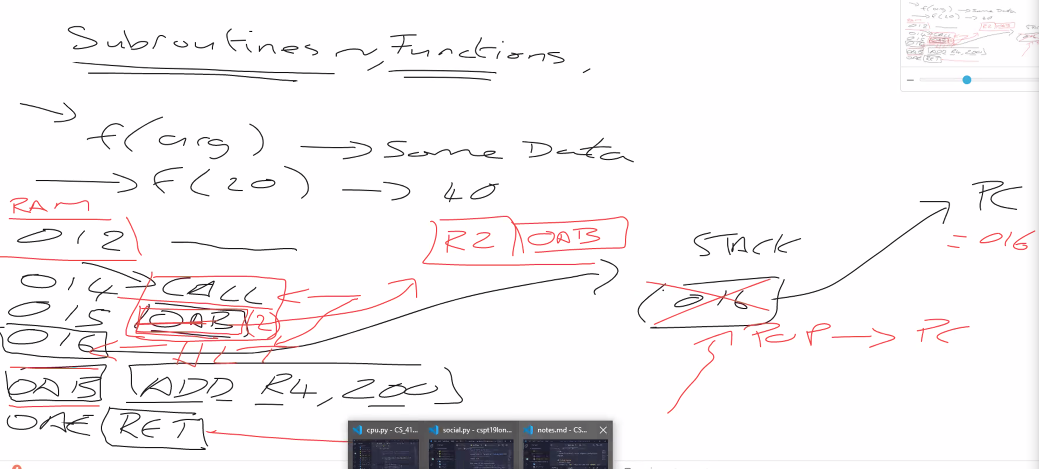

Shown in Assembly Language:

(note this code would need linking to run)

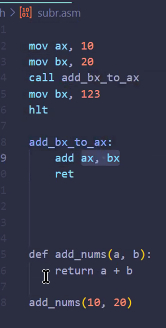

Stack Frames

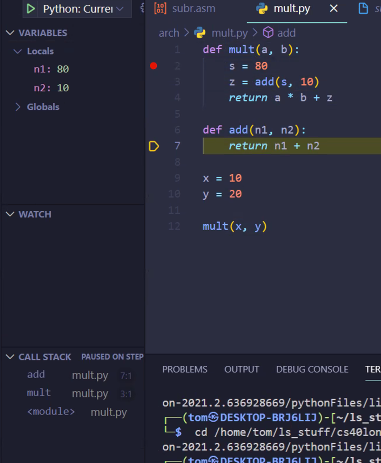

Implementing Call and Return Subroutine

In [ ]:
# in CPU opcodes
LOAD_NUM = 0b10000010  # LDI regA, index
PRINT_NUM = 0b01000111  # PRN regA
PRINT_NAME = 0b01001000 # PRA regA
HALT = 0b00000001      # HLT   
ADD = 0b10100000       # ADD regA, regB
MUL = 0b10100010       # MUL regA, regB     
PUSH = 0b01000101      # PUSH regA
POP = 0b01000110       # POP regA
SHL = 0b10101100       # SHL regA, regB
CALL = 0b01010000      # CALL regA
RET = 0b00010001       # RET  (aka - pop to PC)


# in CPU memory
#ram = [0]*255  # limits to 255
ram = [
       PRN_NAME,
       PRN_NAME,
       PRN_NUM,
       123,
       LOAD_NUM,
       100,
       0,
       LOAD_NUM,
       20,
       1,
       ADD,
       PRN_REG,
       0,
       HALT
]

#in CPU program counter
pc = 0

# in CPU registers (r0-r7)
registers = [0]*8 # limits to 8-bit

# set stack pointer
sp = 7

# set the stack pointer at the top of the stack
# by reserving at a value the far end of the stack
# to limit overruns
registers[sp] = 0xf4

# set running loop
running = True

# running loop
while self.running:
  # fetch
  inst = self.ram[self.pc]

  # decode instrunction size 
  opcode_size = (inst >> 6) +1
  
  # decode
  if inst == PRN_NAME:
    # execute
    print("Jeannine")
  
  # decode
  elif inst == HALT:
    # execute
    running = False
  
  #decode
  elif inst == LOAD_NUM:
    # execute
    # get number
    num = self.ram[self.pc+1]
    # get register index
    reg_index = self.ram[self.pc+2]
    # put number in register list at index of register 
    self.reg[reg_index] = num
  
  #decode
  elif inst == PRN_NUM:
    #execute
    print(self.ram[self.pc+1])

 #decode
  elif inst == PRN_REG:
    #execute
    reg_index = self.ram[self.pc+1]
    print(self.reg[reg_index])

  #decode
  elif inst == ADD:
    #execute
    reg_a = self.ram[self.pc+1]
    reg_b = self.ram[self.pc+2]

    self.reg[reg_a] += self.reg[reg_b]

  #decode
  elif inst == PUSH:
    # decrement
    self.reg[sp] -=1
    # add to stack at memory address assigned by 
    # decremented stack pointer
    self.ram[self.reg[sp]] = self.reg[reg_a]

  #decode
  elif inst == POP:
    # copy value at memory address assigned by 
    # stack pointer 
    self.reg[reg_a] = self.ram[self.reg[sp]]
    # increment
    self.reg[sp] +=1

  elif inst == CALL:    
    # get the address of the net instruction by adding 2 to 
    # the current instruction
    addr_next_inst = self.pc +2
    # decrement
    self.reg[sp] -=1
    # push the address of next instruction onto stack
    # for use in the Return instruction
    self.ram[self.reg[sp]] = addr_next_inst

    reg_index = self.op
    addr = self.reg[reg_index]
    self.pc = addr

  elif inst == RET:
    # copy value at memory address assigned by 
    # stack pointer into the pc 
    self.pc = self.ram[self.reg[sp]]
    # increment
    self.reg[sp] +=1

  #decode
  else:
    print(f'Unknown Instruction {inst}')
    self.running = False

  # increment program counter as determined by opcode size
  # Note: subroutines should not be includes in program counter
  # may need to use a flag and mask to implement
  if inst != CALL or RETURN:
    self.pc += opcode_size

